<a href="https://colab.research.google.com/github/DanKingsleyAIandML/AI-and-ML-Projects/blob/main/Food_Hub_Data_ANalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## FoodHub Data Analysis

**Marks: 60**

Executive Summary



Ratings, which are the main measurement of customer satisfaction, are relatively unaffected by food preparation time, delivery time,and cost of the order. Efforts to decrease order costs, and the time it takes for the customer to recieve their meals do not seem to affect customer satisfaction and are likely to be inefficient methods to increase customer satisfaction and drive revenues forward. The majority of orders (71.2%,) are placed on weekends. The majority of revenue (59.2%) results from orders that are over $20. Orders over $20 only comprise 29 % of the total number of orders.

There are 178 restaurants in the dataframe. The five most popular restuarants account for 33% of all orders. More than 80% of all orders are for the four most popular cuisine types.

Delivery times are lower on weekends so more deliveries can be made per peak business hour during the higher demand weekends than on weekdays. Customers show a definite preference for specific cuisine types, and specific restuarants. Increasing the incentives to drive large weekend orders from already popular restuarants vending already pupular cuisine types is the most efficient strategy for driving revenues higher.

The recommendation is that promotional materials should be given to customers placing weekend orders of over $20 from the Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Driving up large orders placed on weekends is the most efficient method of increasing net revenue.

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# mounting drive content
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The Dataframe has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#Code to delineate the number of rows and columns in the dataframe.
df.shape

(1898, 9)

#### Observations:


There are 1898 rows and 9 columnsin the data frame.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Code to get a dataframe and datatype summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The dataframe columns "order_id, Customer_id, food_preparation_time, and delivery_time," have the data type integer.
The dataframe columns "retaurant_name,cuisine_type, day_of_the_week, and rating," have the data type object.
The data frame column "cost_of_the_order," has the data type float.

The column "rating" has a data type of object. It might be efficacious to have the data type converted to a numeric data type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

#### Observations:


In [ ]:
# Question 3
#this code will print the number of missing values in each of the column
# code also looking at indiviual column for missing values
Row_NaN=df.isnull().sum()
print (("The number of NaN in each row is"),(Row_NaN))

cost_nan_count = df['cost_of_the_order'].isna().sum()
print (("The number of NaN cost of orders is"),(cost_nan_count))

preparation_nan_count = df['food_preparation_time'].isna().sum()
print (("The number of NaN food preparation time values is"),(preparation_nan_count))

delivery_nan_count = df['delivery_time'].isna().sum()
print (("The number of NaN food preparation time values is"),(delivery_nan_count))

total_NaN=df.isnull().sum().sum()
print (("The number of NaN values in the dataframe is"),(total_NaN))


The number of NaN in each row isis order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
The number of NaN cost of orders is 0
The number of NaN food preparation time values is 0
The number of NaN food preparation time values is 0
The number of NaN values in the dataframe is 0


There does not seem to be a significant amount of missing data in the dataframe, but as we will see below almost 40% of the customers did not rate the FoodHub service that delivered their orders.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The minimum food preparation time is 20.0 minutes. Average food preparation time is 27.37 minutes or 27 minutes 22 seconds, The maximum food preparation time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

There are a substantial number of orders in which ratings are not given. Of the 1898 rows in the data base 736 rows or 38.8 % of the possible rating responses are not rated.

In [ ]:
#code for finding breaking down ratings and finding out number of orders not rated
#breaking down ratings
Rating_count=df['rating'].value_counts()
print ("The number of each individual order ratings is")
print (Rating_count)
# Code for finding the percentaage of rows not rated.
df_Not_Rated=df[df['rating'] == 'Not given'].copy()
percent_not_rated=(df_Not_Rated.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders not rated is ",round(percent_not_rated,1))

The number of each individual order ratings is
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
The percentage of orders not rated is  38.8


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order ID

The number of individual orders:

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

Customer ID

The number of individual customers:

In [ ]:
# check unique customer ID
df['customer_id'].count()

1898

Restaurant name

There are 178 restaurants in the dataframe.The top five restaurants by number of orders placed are the Shake Shack, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

In [ ]:
# Code total number of resturants
Name_Counts = df['restaurant_name'].nunique()
print("The totalnumber of restuarants serviced is",(Name_Counts))
#Code for finding the top five resturants for numbers of orders
Name_Top_Five = df['restaurant_name'].value_counts()[:5]
print("The five most popular resturants are")
print (Name_Top_Five)
# Code for percentaage of orders for top 5 restuarants.
percent_top_five=(Name_Top_Five.sum()/df['customer_id'].count())*100
print("The percentage of orders from the top five resturants is ",round(percent_top_five,1))


The totalnumber of restuarants serviced is 178
The five most popular resturants are
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64
The percentage of orders from the top five resturants is  33.4


Cuisine type

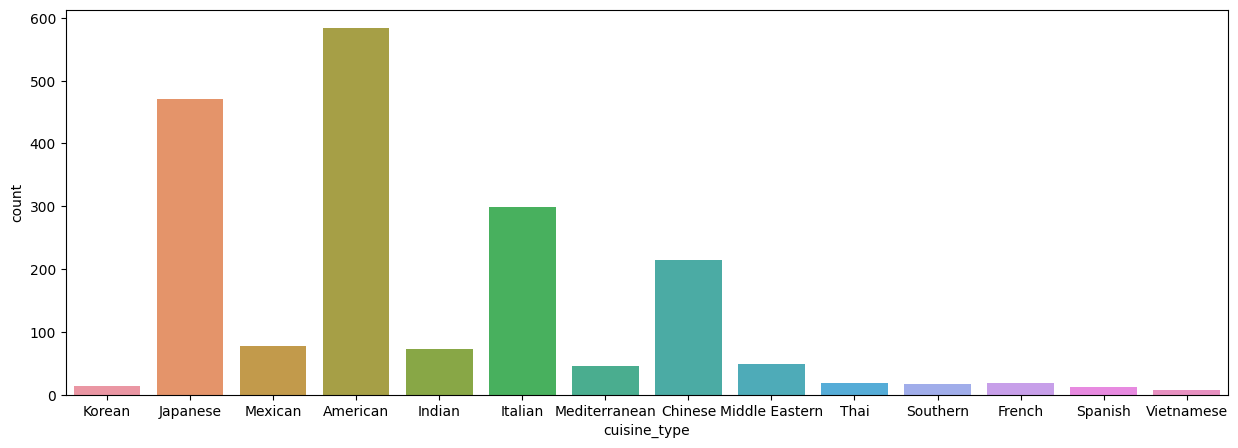

In [ ]:
#Code for graphically identifying the top cuisine types
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.savefig("output.jpg", bbox_inches='tight')

There are four cuisine types that each have more than 200 orders in the dataframe. After the top four cuisine type the next most popular cuisine types have much fewer orders. The top four cuisine types by number of orders placed are: American, Japanese, Italian, and Chinese. The percentage of orders for the tope four cuisine types are  82.6 % of total orders.

In [ ]:
#code for finding the total number of cuisinetypes
tot_cuisine_types=df['cuisine_type'].nunique()
print("The number of cuisine types in the data base is")
print(tot_cuisine_types)

#Code for finding the top four cuisine types for numbers of orders
Name_Top_Cuisines = df['cuisine_type'].value_counts()[:4]
print("The four most popular cuisine types are")
print (Name_Top_Cuisines)
# Code for percentaage of orders for top 5 cuisine types
percent_top_five_cuisines=(Name_Top_Cuisines.sum()/df['customer_id'].count())*100
print("The percentage of orders for the tope four cuisine types are ",round(percent_top_five_cuisines,1))


The number of cuisine types in the data base is
14
The four most popular cuisine types are
American    584
Japanese    470
Italian     298
Chinese     215
Name: cuisine_type, dtype: int64
The percentage of orders for the tope four cuisine types are  82.6


Cost of order

There is a near bimodal distribution of order costs with almost 30% of orders (actually 29.2% of orders) placed costing more than $20.

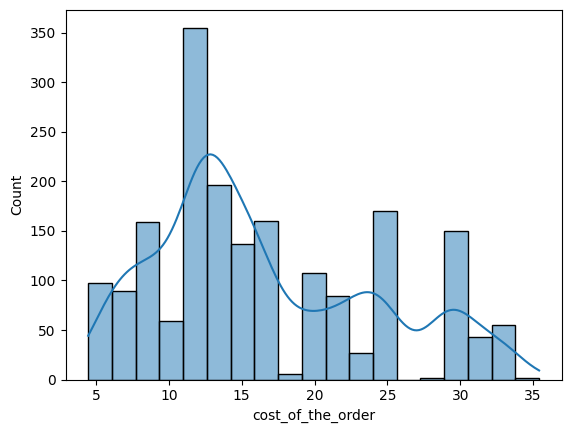

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [ ]:
# Code for percentage orders over $20
data_cost_over_20= df[df['cost_of_the_order']>20]
percent_over_20 =(data_cost_over_20.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders over $20 is",round(percent_over_20,1))
#Code showing near bi-modal distribution of order costs


The percentage of orders over $20 is 29.2


Day of the week

Almost 75% of orders (actually 71.2%,) in the data frame are placed on weekends

<Axes: xlabel='day_of_the_week', ylabel='count'>

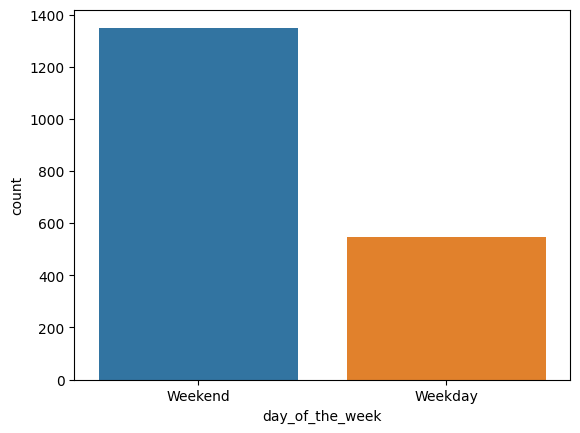

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week')
plt.savefig("output.jpg", bbox_inches='tight')

In [ ]:
# Code for percentage orders on weekends
df_weekend= df[df['day_of_the_week']=='Weekend']
weekend_only=df_weekend['order_id'].count()
percent_weekend_only =(df_weekend['order_id'].count()/df['order_id'].nunique())*100
print("The percentage of orders placed on weekends id",round(percent_weekend_only,1))

The percentage of orders placed on weekends id 71.2


Rating

Anlysis of customer order ratings numerically and graphically show:
1.The percentage of orders not rated is of orders is 38.8%.
2.A large portion (31%) of orders were rated 5, with 20.3% of orders rating 4, and 9.9% of orders rating three.

In [ ]:
Rating_count=df['rating'].value_counts()
print ("The number of each individual order ratings is")
print (Rating_count)
# Code for percentaage of rows not rated.
df_Not_Rated= df[df['rating']=='Not given']
df_Rated_5= df[df['rating']=='5']
df_Rated_4= df[df['rating']=='4']
df_Rated_3= df[df['rating']=='3']
# Code for finding the percentaage of rows not rated.
df_Not_Rated = df[df['rating'] == 'Not given'].copy()
df_Rated_5 = df[df['rating'] == '5'].copy()
df_Rated_4 = df[df['rating'] == '4'].copy()
df_Rated_3 = df[df['rating'] == '3'].copy()
#percetage of ratings Not Rated
percent_not_rated=(df_Not_Rated.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders not rated is ",round(percent_not_rated,1),"%")
#percetage of ratings 5
percent_rated_5=(df_Rated_5.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders rated  5 is ",round(percent_rated_5,1),"%")
#percetage of ratings 4
percent_rated_4=(df_Rated_4.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders rated  4 is ",round(percent_rated_4,1),"%")
#percetage of ratings 3
percent_rated_3=(df_Rated_3.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders rated  3 is ",round(percent_rated_3,1),"%")

The number of each individual order ratings is
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
The percentage of orders not rated is  38.8 %
The percentage of orders rated  5 is  31.0 %
The percentage of orders rated  4 is  20.3 %
The percentage of orders rated  3 is  9.9 %


Rating data in the original data base can be represented graphically in the bar graph below.

<Axes: xlabel='rating', ylabel='count'>

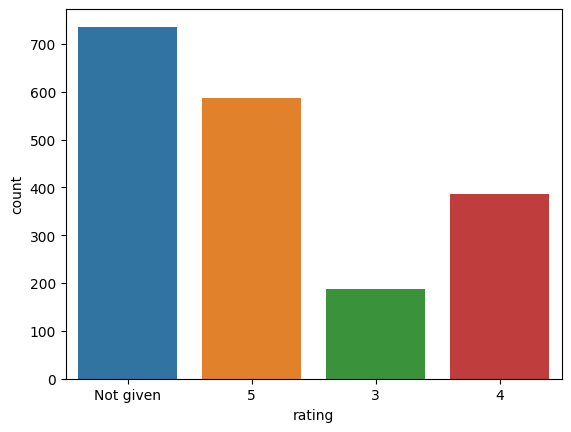

In [ ]:
sns.countplot(data = df, x = 'rating')
plt.savefig("output.jpg", bbox_inches='tight')

Food Preparation time

Food preparation is a relatively uniform curve without major peaks or valleys from 22 to 33 minutes. Both the histogram and the boxplot show an even distribution of the data.

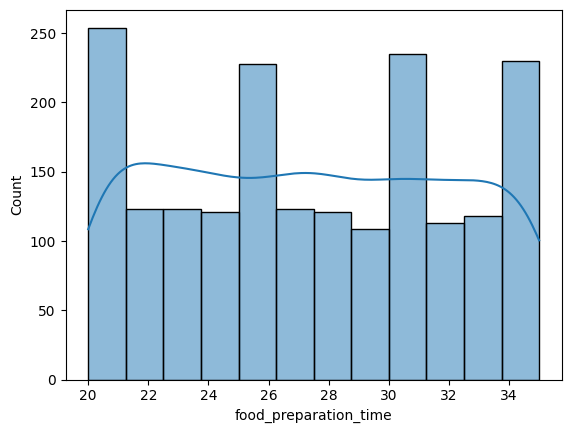

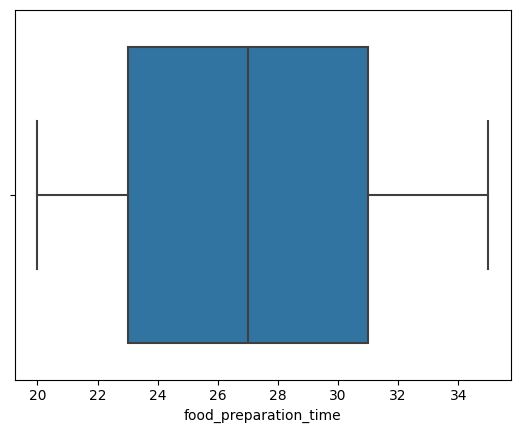

In [ ]:
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Delivery time

The distribution of delivery times shows a peak with both the histogram and boxplots showing that the majority of orders take 22 minutes or longer to deliver. Numerical analysis of the dataframe shows that 64.1% of the deliveries takes 22 minutes or longer


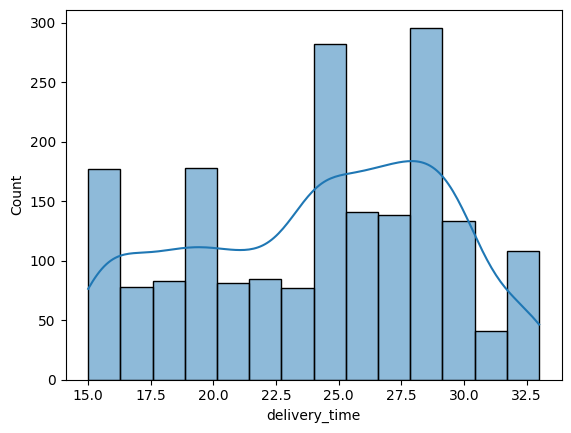

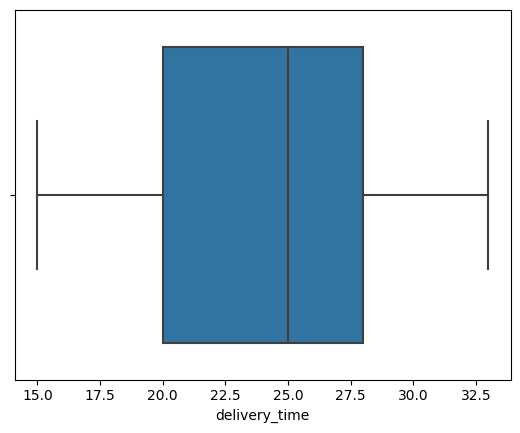

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.histplot(data=df,x='delivery_time',kde=True) ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [ ]:
# Code for percentage of delivery times over 22 minutes
data_delivery_over_22= df[df['delivery_time']>22]
percent_over_22_minutes =(data_delivery_over_22.shape[0]/df['order_id'].nunique())*100
print("The percentage of deliveries taking over 22 minutes is",round(percent_over_22_minutes,1),'%')


The percentage of deliveries taking over 22 minutes is 64.1 %


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

The top five restaurants and the number of orders placed with each restaurant.

In [ ]:
#code for top five restaurants and the number of orders received
df['restaurant_name'].value_counts()[:5]


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

About one third of all orders are placed with the top five restaurants.

In [ ]:
#code for the percentage of orders placed with the top five restaurants
tot_orders_top_five=df['restaurant_name'].value_counts()[:5].sum()
percent_top_five = (tot_orders_top_five.tolist()/df['order_id'].nunique())*100
print("The percentage of orders placed with the top five restaurants is ",round(percent_top_five,1),'%')
#code to number of individual restuarant orders
print('The number of Shake Shack orders is',df[df['restaurant_name'].isin(['Shake Shack'])]['restaurant_name'].shape[0])
print('The number of The Meatball Shop orders is',df[df['restaurant_name'].isin(['The Meatball Shop'])]['restaurant_name'].shape[0])
print('The number of Blue Ribbon Sushi orders is',df[df['restaurant_name'].isin(['Blue Ribbon Sushi'])]['restaurant_name'].shape[0])
print('The number of Blue Ribbon Fried Chicken orders is',df[df['restaurant_name'].isin(['Blue Ribbon Fried Chicken'])]['restaurant_name'].shape[0])
print('The number of Parm orders is',df[df['restaurant_name'].isin(['Parm'])]['restaurant_name'].shape[0])

The percentage of orders placed with the top five restaurants is  33.4 %
The number of Shake Shack orders is 219
The number of The Meatball Shop orders is 132
The number of Blue Ribbon Sushi orders is 119
The number of Blue Ribbon Fried Chicken orders is 96
The number of Parm orders is 68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

Observations:

The most popular cuisine type on weekend is American with 415 orders, which is almost a quarter of the total orders in the dataframe.

In [ ]:

# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
print ("The most popular cuisine on weekends is")
print (df_weekend['cuisine_type'].value_counts()[:1])

#code for the percentage of orders placed for the most popular cuisine type on weekends
top_weekend_cuisine=df_weekend['cuisine_type'].value_counts()[:1]
top_weekend_cuisine_percent=(top_weekend_cuisine/df['order_id'].nunique())*100
print("The percentage of total orders placed for the top cuisine on weekends is  ",round(top_weekend_cuisine_percent,1),'%')

The most popular cuisine on weekends is
American    415
Name: cuisine_type, dtype: int64
The percentage of total orders placed for the top cuisine on weekends is   American    21.9
Name: cuisine_type, dtype: float64 %


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Code for percentage orders over $20
data_cost_over_20= df[df['cost_of_the_order']>20]
percent_over_20 =(data_cost_over_20.shape[0]/df['order_id'].nunique())*100
print("The percentage of orders over $20 is",round(percent_over_20,1))

The percentage of orders over $20 is 29.2


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#code for the mean delivery time
Average_Delivery_Time = df['delivery_time'].mean()
print('The average delivery time is', round(Average_Delivery_Time, 2), 'minutes')

# Code for percentage of delivery times over 22 minutes
data_delivery_over_22= df[df['delivery_time']>22]
percent_over_22_minutes =(data_delivery_over_22.shape[0]/df['order_id'].nunique())*100
print("The percentage of deliveries taking over 22 minutes is",round(percent_over_22_minutes,1))

The average delivery time is 24.16 minutes
The percentage of deliveries taking over 22 minutes is 64.1


#### Observations:


The mean delivery time is 24.16 minutes with the majority of deliveries taking 22 minutes or longer. The mean delivery time is close to the shortest time for the main body of deliveries.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


Top customers place an average of more than ten total orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Cost over 20 and cuisine type


The majority of cuisine types have a mean order cost over $20 as shown in the boxplot below.

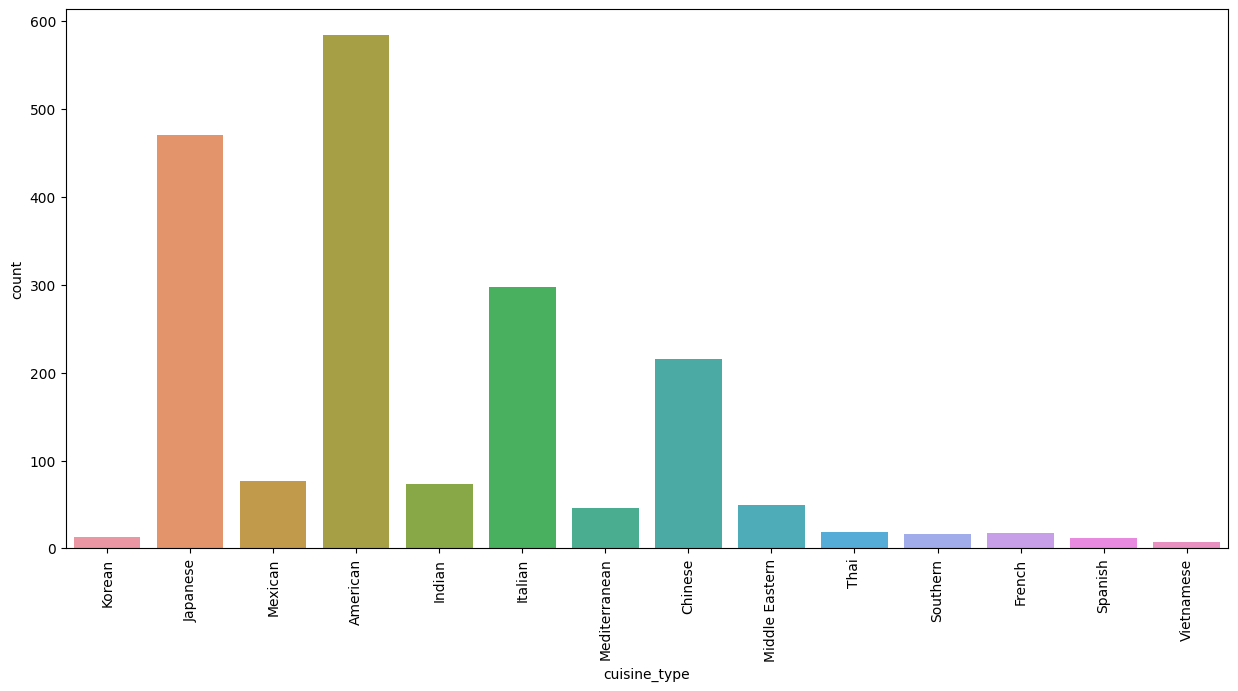

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation = 90)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

In [ ]:
#code to find the most popular cuisine types with orders over $20
data_cost_over_20= df[df['cost_of_the_order']>20]
data_cost_over_20['cuisine_type'].value_counts()[:5]

# Code for percentage of top five cuisine types with orders over $20
data_delivery_over_22= df[df['delivery_time']>22]
percent_over_22_minutes =(data_delivery_over_22.shape[0]/df['order_id'].nunique())*100
print("The percentage of deliveries taking over 22 minutes is",round(percent_over_22_minutes,1))



American    171
Japanese    122
Italian      90
Chinese      62
Indian       23
Name: cuisine_type, dtype: int64

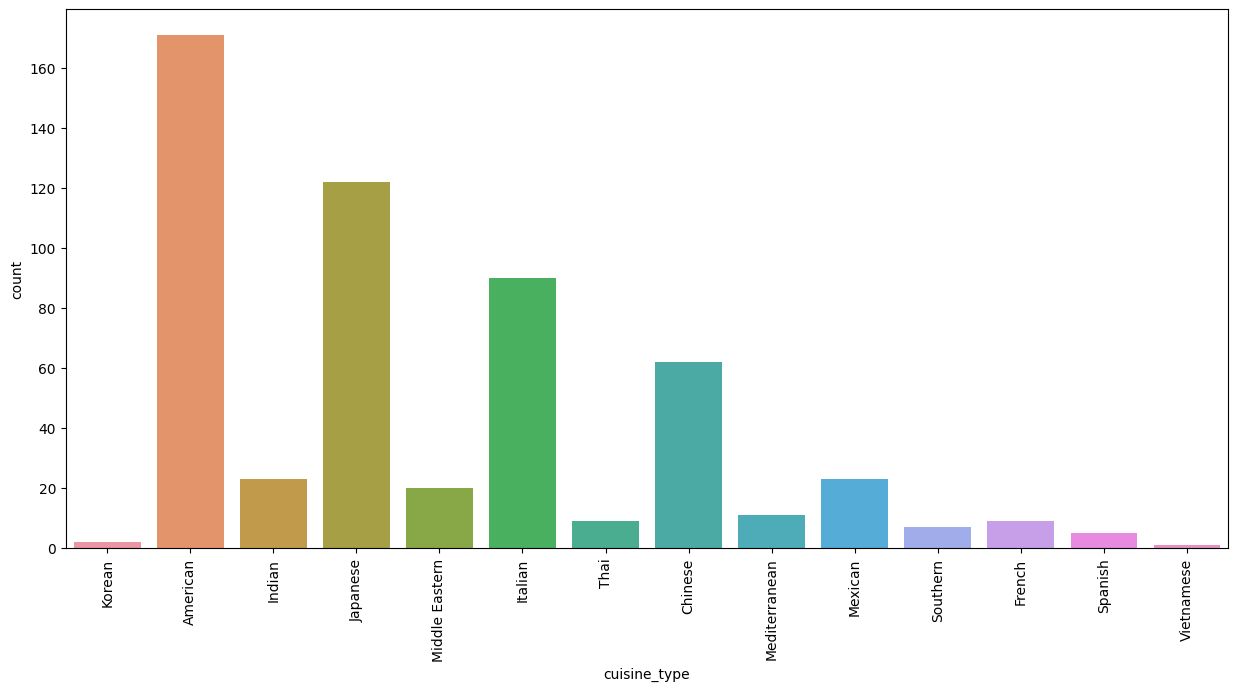

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=data_cost_over_20, x='cuisine_type');
plt.xticks(rotation = 90)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Cuisine vs Food Preparation time

Food prepation time is relatively static over all cuisine types as shown by the relatively flat curve of prepation time for all the cuisine types in the dataframe as shown in the line plat below. This is true even if we correct the data so that only the higher cost orders over 20 dollars are used to plot how food preparation time and cuisine type are related.

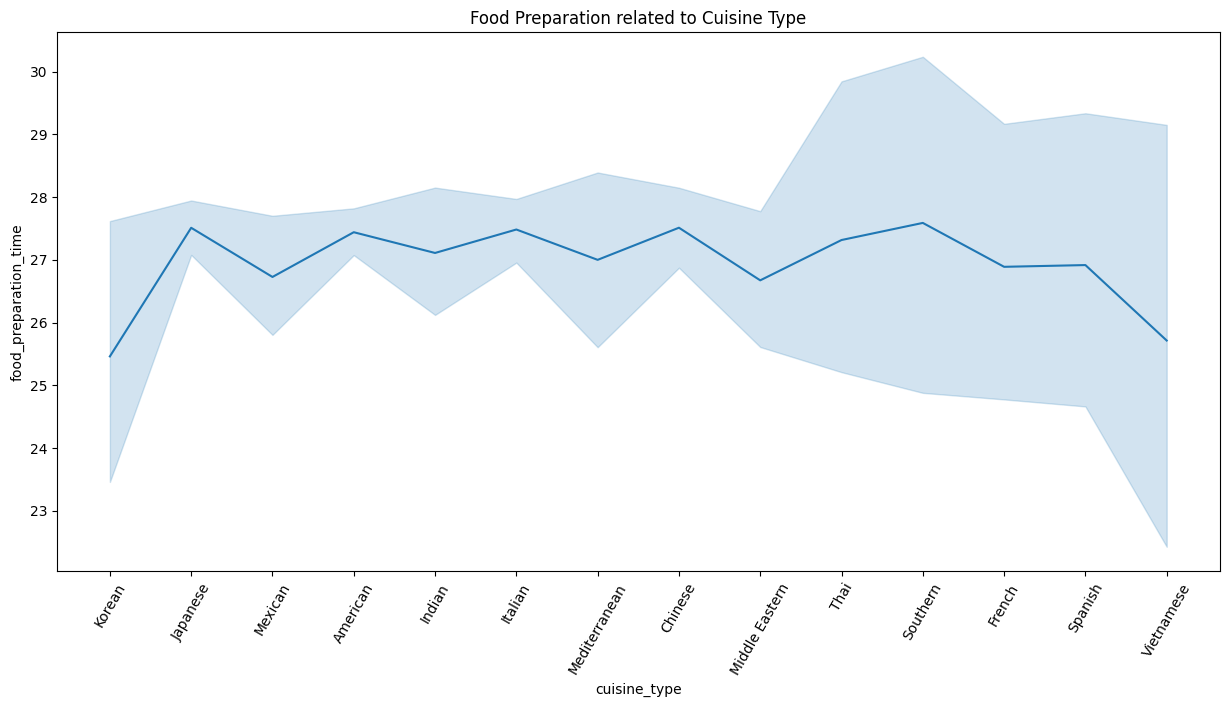

In [ ]:
# creating a line plot
plt.figure(figsize=(15,7))
sns.lineplot(data = df, x = 'cuisine_type' , y = 'food_preparation_time');
plt.xticks(rotation = 60)
plt.title("Food Preparation related to Cuisine Type")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

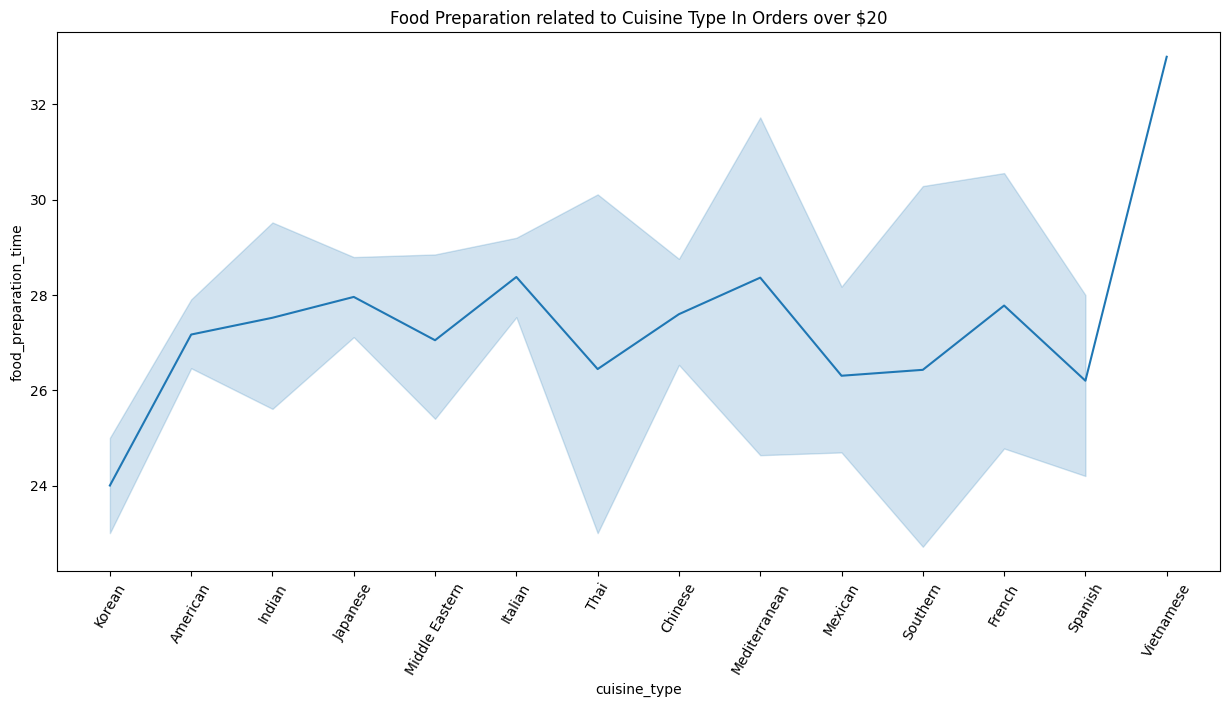

In [ ]:
# creating a line plot
plt.figure(figsize=(15,7))
sns.lineplot(data = data_cost_over_20, x = 'cuisine_type' , y = 'food_preparation_time');
plt.xticks(rotation = 60)
plt.title("Food Preparation related to Cuisine Type In Orders over $20")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Day of the Week vs Delivery time

Delivery times are greater on the weekdays and shorter on the weekends when there is less traffic.

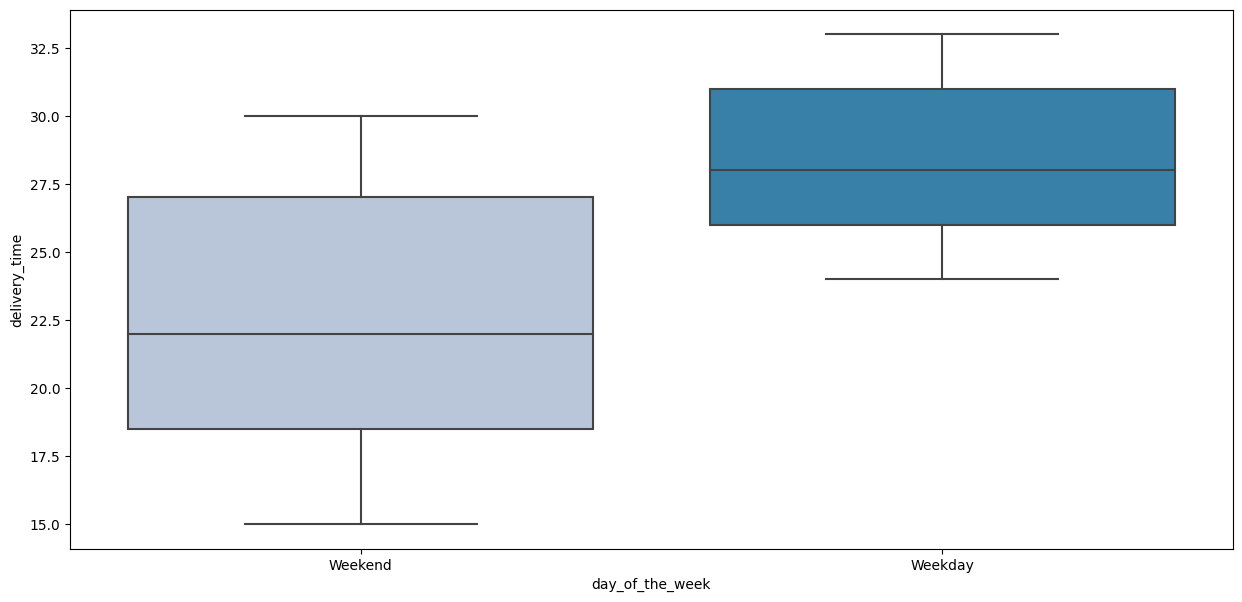

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y = 'delivery_time', data = df, palette = "PuBu")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Rating vs Delivery time

Ratings are relatively independent of delivery time. The distribution of rated orders are all uniform and similar per individual delivery times.

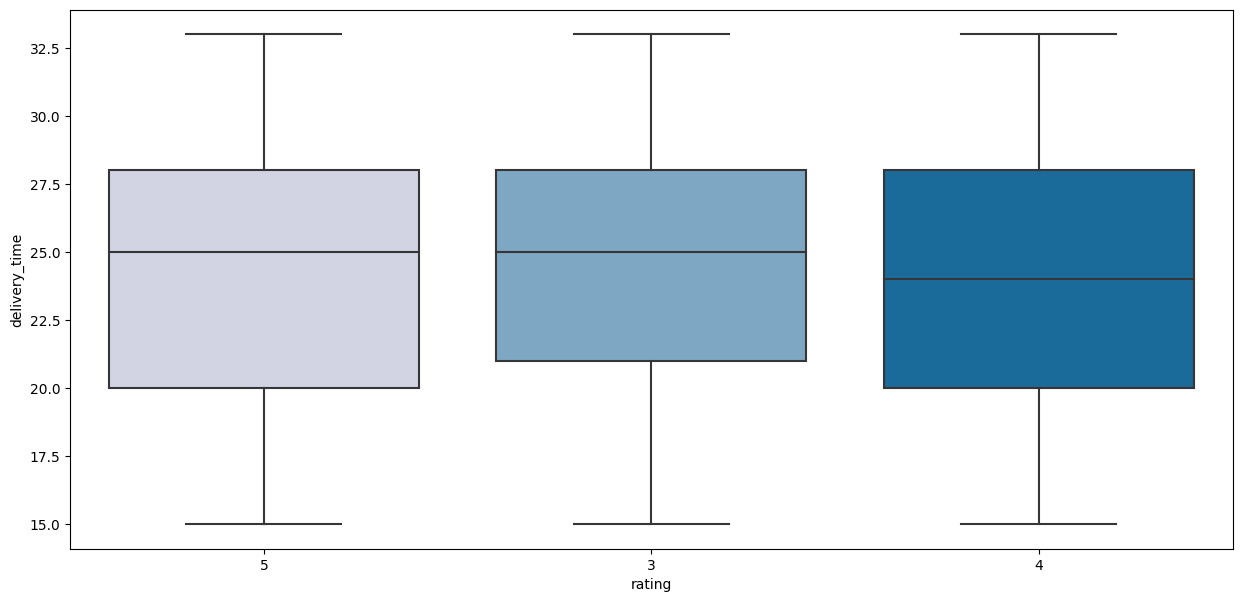

In [ ]:
# Relationship between rating and delivery time

df_Rated_only= df[df['rating']!='Not given']

plt.figure(figsize=(15,7))
sns.boxplot(x='rating', y = 'delivery_time', data = df_Rated_only, palette = "PuBu")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Rating vs Food preparation time

Ratings are relatively independent of food preparation time. The distribution of rated orders are all uniform and similar per individual food preparation times.

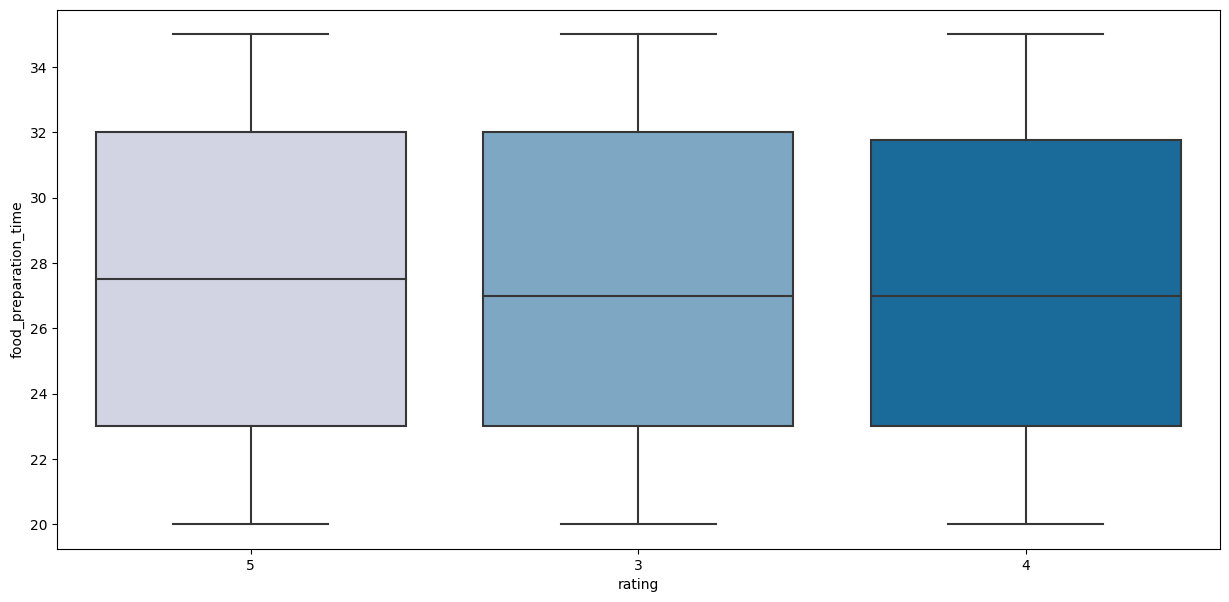

In [ ]:
# Relationship between rating  and preptime
plt.figure(figsize=(15,7))
sns.boxplot(x='rating', y = 'food_preparation_time', data = df_Rated_only, palette = "PuBu")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Rating vs Cost of the order

Ratings are relatively independent of the cost of the order. The distribution of rated orders are all uniform and similar per individual order costs

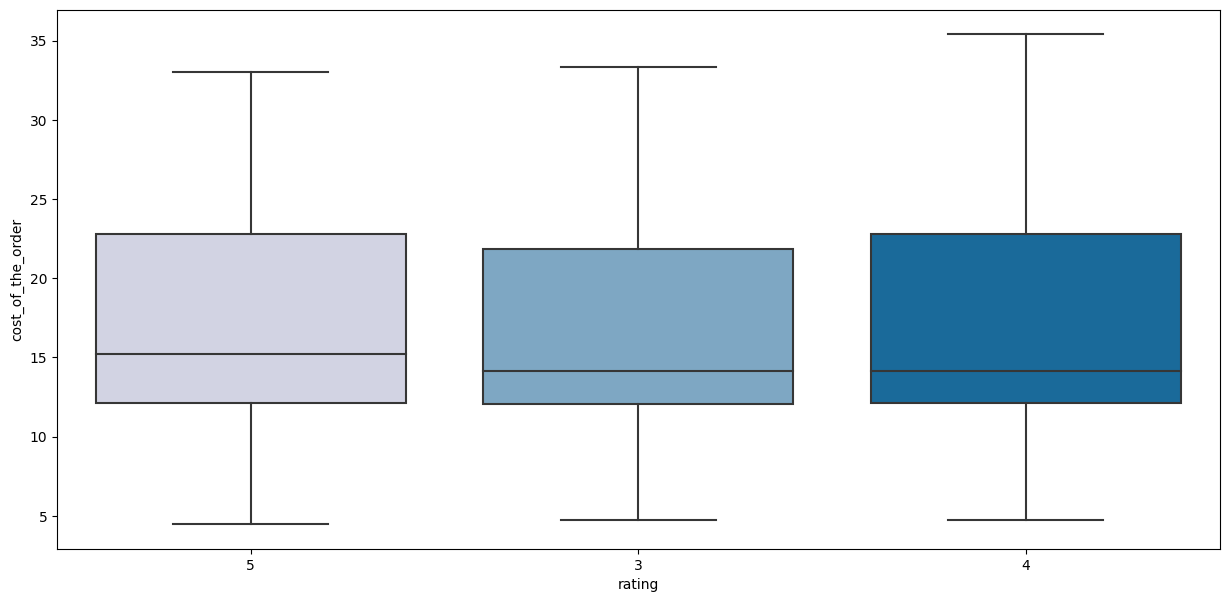

In [ ]:
# Relationship between rating  and preptime
plt.figure(figsize=(15,7))
sns.boxplot(x='rating', y = 'cost_of_the_order', data = df_Rated_only, palette = "PuBu")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Ratings with orders costing over $20.



Correlation among variables

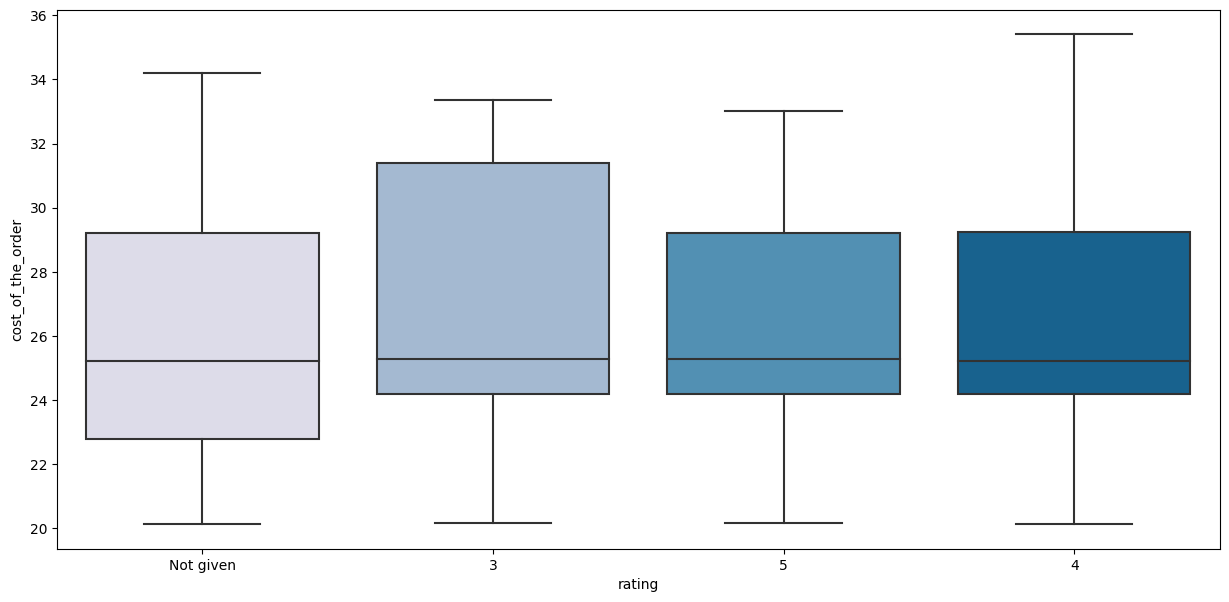

In [ ]:
# Relationship between rating  and Cost of Order
data_cost_over_20= df[df['cost_of_the_order']>20]
plt.figure(figsize=(15,7))
sns.boxplot(x='rating', y = 'cost_of_the_order', data = data_cost_over_20, palette = "PuBu")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

<ipython-input-34-bdb87ec7d258>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df[['restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']].corr(),annot=True, cbar=False);


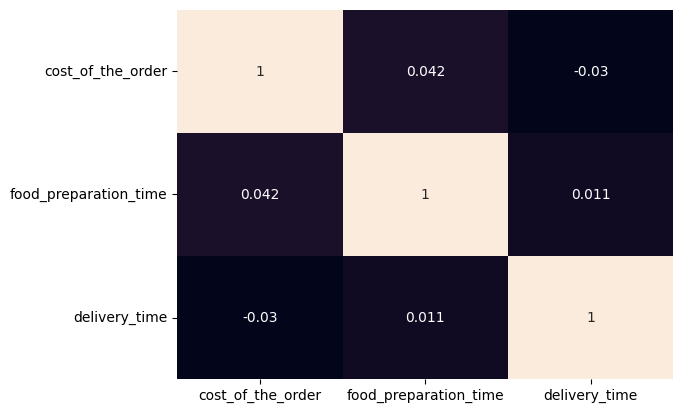

In [ ]:
sns.heatmap(data=df[['restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']].corr(),annot=True, cbar=False);
plt.savefig("output.jpg", bbox_inches='tight')


**Restaurant Revenue Analysis**
Names of the restuarants in descending order of total sales


In [ ]:
#code to find the name of the restuarants in descending order of total sales
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

Total restaurant revenue and the percent of revenue form orders over $20.

In [ ]:
#code for total restaurant revenue
dr_total_revenue=df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sum()
print("The total revenue is ",round(dr_total_revenue,2))
#code for restaurant revenue from orders over $20
data_cost_over_20= df[df['cost_of_the_order']>20]
dr_total_revenue_over_20=data_cost_over_20.groupby(['restaurant_name'])['cost_of_the_order'].sum().sum()
print("The total revenue for orders over $20 is ",round(dr_total_revenue_over_20,2))

percent_restaurant_revenue_big_orders =(dr_total_revenue_over_20/dr_total_revenue)*100
print("The percentage of restaurant revenue from orders ove $20 is ",round(percent_restaurant_revenue_big_orders,1))



The total revenue is  31314.82
The total revenue for orders over $20 is  14754.91
The percentage of restaurant revenue from orders ove $20 is  47.1


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

#### Observations:


The names of the top restaurants with orders over $20 are: The Meatball Shop, Blue Ribbon Fried, Chicken, Shake Shack, and Blue Ribbon Sushi. Parm is in the list of restaurants with the top number of orders and should be included in the promotion by virtue of the number of orders placed.

In [ ]:
#restuaurant rating and number of orders placed for consideration of promotional advertising

# Filter the rated restaurants from analysis of rating vs delivery time above
df_Rated_only= df[df['rating']!='Not given'].copy()
# Convert rating column from object to integer so that numerical rating values can be used to compile a list
df_Rated_only['rating'] = df_Rated_only['rating'].astype('int')
# df with restaurant names and their rating counts
restaurant_rating = df_Rated_only.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
# Get the restaurant names that have rating count more than 50
rest_names_rating_more_than_50 = restaurant_rating.loc[restaurant_rating['rating'] > 50]['restaurant_name'].values
# Filter to get the data of restaurants that have rating count more than 50
df_mean_rating_4 = df_Rated_only[df_Rated_only['restaurant_name'].isin(rest_names_rating_more_than_50)].copy()
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_rating_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
promotional_restaurants = df_mean_rating_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
print("The names of the restaurants that orders over $20 should be promoted is ")
print (promotional_restaurants['restaurant_name'])
print ("The names of the top five restaurants for number of orders placed is similar and should be considered for promotion")
print ("The list of the top five restaurants by ordes placed is")
print (df['restaurant_name'].value_counts()[:5])

The names of the restaurants that orders over $20 should be promoted is 
0            The Meatball Shop
1    Blue Ribbon Fried Chicken
2                  Shake Shack
3            Blue Ribbon Sushi
Name: restaurant_name, dtype: object
The names of the top five restaurants for number of orders placed is similar and should be considered for promotion
The list of the top five restaurants by ordes placed is
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#if else loop for computing
def if_else_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0


#total revenue computation
compute_net_revenue = df['cost_of_the_order'].apply(if_else_revenue)
dr_total__net_revenue=compute_net_revenue.sum().sum()

print("The total net revenue in dollars is",round(dr_total__net_revenue,2))

#revenue oof orders over $20 computation
data_cost_over_20= df[df['cost_of_the_order']>20]
df_net_revenue_over_20 = data_cost_over_20['cost_of_the_order'].apply(if_else_revenue)
dr_total__net_revenue_big_orders=df_net_revenue_over_20.sum().sum()
print("The total net revenue for order over $20 is",round(dr_total__net_revenue_big_orders,2))
#
print("The percentage of revenue from orders over $20 is" )
percent_high_oder_revenue=(dr_total__net_revenue_big_orders/dr_total__net_revenue)*100
print(round(percent_high_oder_revenue,2),'%')

The total net revenue in dollars is 6166.3
The total net revenue for order over $20 is 3688.73
The percentage of revenue from orders over $20 is
59.82 %


If we increase the number of orders over $20 by five or eight percent the total net revenue will increase.

In [ ]:
increased_projected_revenue=(dr_total__net_revenue_big_orders*1.05)
print ("The total revenue from increasing orders over $20 by 5% is")
print(round(increased_projected_revenue,2))
print("The total net revenue for existing orders over $20 is",round(dr_total__net_revenue_big_orders,2))
projected_increase=(increased_projected_revenue-dr_total__net_revenue_big_orders)
print ("increasing orders over $20 by 5% yeilds an increased revenue of")
print(round(projected_increase,2))

increased_projected_revenue=(dr_total__net_revenue_big_orders*1.08)
print ("The total revenue from increasing orders over $20 by 8% is")
print(round(increased_projected_revenue,2))
print("The total net revenue for existing orders over $20 is",round(dr_total__net_revenue_big_orders,2))
projected_increase=(increased_projected_revenue-dr_total__net_revenue_big_orders)
print ("increasing orders over $20 by 8% yeilds an increased revenue of")
print(round(projected_increase,2))


The total revenue from increasing orders over $20 by 5% is
3873.16
The total net revenue for existing orders over $20 is 3688.73
increasing orders over $20 by 5% yeilds an increased revenue of
184.44
The total revenue from increasing orders over $20 by 8% is
3983.83
The total net revenue for existing orders over $20 is 3688.73
increasing orders over $20 by 8% yeilds an increased revenue of
295.1


#### Observations:


ALmost 60% of revenue comes from orders over $20. The percentage of orders over $20. compared to the total number of orders was less than30%. Less than 30% of the orders account for almost 2/3 of the revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['time_to_customer'] = df['food_preparation_time'] + df['delivery_time']
data_delivery_over_60= df[df['time_to_customer']>60]

percent_delivery_over_60= (data_delivery_over_60.shape[0]/df['order_id'].nunique()) * 100
print('The percentage of orders taking more than sixty minutes', round(percent_delivery_over_60, 2), '%')


The percentage of orders taking more than sixty minutes 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it

mean_delivery_Weekday=(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
mean_delivery_weekend=(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print ("The average delivery time on weekdays is",)
print(round(mean_delivery_Weekday,2))
print ("The average delivery time on weekends is",)
print(round(mean_delivery_weekend,2))
percent_longer_delivery_weekdays=(((mean_delivery_Weekday/mean_delivery_weekend)-1)*100)
print ("The delivery time on weekdays is greater than delivery time on weekends by" )
print(round(percent_longer_delivery_weekdays,2),'%')




The average delivery time on weekdays is
28.34
The average delivery time on weekends is
22.47
The delivery time on weekdays is greater than delivery time on weekends by
26.12 %


#### Observations:


 The majority of orders (71.2%),are placed on weekends, and the majority of of revenue (59.82%,) results from orders that are over $20. Delivery times are lower on weekends so more deliveries can be made during the higher demand weekend business hours than on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Customers show a definite preferance for specific cuisine types and specific restuarants. The list of the top five restaurants by both customer ratings and numbers of of order are almost indentical. Increasing the incentives to drive large weekend order from already popular restuarants vending already pupular cuisine types seems to be the most efficient strategy for driving revenues higher.


### Recommendations:


The recommendation is that promotional materials should be given to customers placing weekend orders of over $20 from the Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Driving up large orders placed on weekends is the most efficient method of increasing net revenue.


---